# **Pro Kabbadi all 7 seasons data.**

Where this results can be help full : At auction were teams bid for players.

* Record Holders : Created Different functions to get. functions takes N as input to return that no. of players info like (Id, Name, Score).
  * Top raiders : who scored most in raids in a match. 
  * Top defenders : who scored most in tackles in a match.
  * Top AllRounder : who scored most in both in a match.

* Players whole info. : A function that takes the player id as input and return the details like.
  * Name 
  * Total matches played (shows experience) 
  * Stats of performance in all the teams that player played for(DataFrame).
    * Team name ( from teams data file)
    * no. of matches played ( from player data file)
    * performance include successful and unsuccessful (raids and tackles)



* More work in process :
 * Player currentyl playing for which team we get from match data file.
 * From above after getting the performances in different team we will reach out to thoes coches were player given great performance and appoint them.
 * This much for now .. It will be much helpfull if you would suggest more.


# Understanding the data

In [64]:
import pandas as pd
import numpy as np


In [7]:
matches =pd.read_csv('https://raw.githubusercontent.com/ranganadhkodali/Pro-Kabadi-season-1-7-Stats/master/DS_match.csv' , index_col='Unnamed: 0')

In [8]:
matches.head()

,match_id,match_number,date,start_time,result,player_id_of_the_match,player_name_of_the_match,series_id,series_name,status,toss_winner,toss_selection,venue_id,venue_name,home_team_id,home_team_name
0,1,Match 1,7/26/2014,20:00,U Mumba beat Jaipur Pink Panthers (45 - 31),29.0,29.0,1,"Pro Kabaddi League Season 1, 2014",Full Time,5,Choice of court : Right,5,"DOME@NSCI SVP Stadium, Mumbai",5.0,U Mumba
1,10,Match 10,7/31/2014,21:00,Bengal Warriors beat Dabang Delhi (42 - 40),12.0,12.0,1,"Pro Kabaddi League Season 1, 2014",Full Time,2,Choice of court : Left,4,"Netaji Subhash Chandra Bose Indoor Stadium, Ko...",4.0,Bengal Warriors
2,100,Match 39,8/9/2015,21:00,Dabang Delhi beat Patna Pirates (45-26),58.0,58.0,2,"Pro Kabaddi League, 2015",Full Time,6,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN
3,101,Match 40,8/10/2015,20:00,Jaipur Pink Panthers beat Dabang Delhi (51-21),NaN,NaN,2,"Pro Kabaddi League, 2015",Full Time,3,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN
4,102,Match 41,8/11/2015,20:00,Jaipur Pink Panthers beat Puneri Paltan (31-18),86.0,86.0,2,"Pro Kabaddi League, 2015",Full Time,7,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 683
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match_id                  684 non-null    int64  
 1   match_number              684 non-null    object 
 2   date                      684 non-null    object 
 3   start_time                684 non-null    object 
 4   result                    679 non-null    object 
 5   player_id_of_the_match    575 non-null    float64
 6   player_name_of_the_match  575 non-null    float64
 7   series_id                 684 non-null    int64  
 8   series_name               684 non-null    object 
 9   status                    684 non-null    object 
 10  toss_winner               684 non-null    int64  
 11  toss_selection            684 non-null    object 
 12  venue_id                  684 non-null    int64  
 13  venue_name                684 non-null    object 
 14  home_team_

In [ ]:
matches = matches[matches.result.notnull()]

In [ ]:
len(matches.match_id.unique())

679

In [35]:
players = pd.read_csv('https://raw.githubusercontent.com/ranganadhkodali/Pro-Kabadi-season-1-7-Stats/master/DS_players.csv')

In [36]:
players.head()

,Unnamed: 0,index,player_id,player_name,player_short_name,player_skill,player_role,player_red_card,player_yellow_card,player_green_card,player_jersey,player_played,player_captain,player_on_court,player_on_starter,player_total_points,player_raid_points_total,player_raid_points_touch,player_raid_points_raid_bonus,player_tackle_points_total,player_tackle_points_touch,player_tackle_points_capture_bonus,player_raids_total,player_raids_successful,player_raids_unsuccessful,player_raids_Empty,player_tackles_total,player_tackles_successful,player_tackles_unsuccessful,match_id,team_id
0,0,0,15,Sanjay Shrestha,Sanjay Shrestha,NaN,NaN,False,False,False,88,True,False,True,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
1,0,0,96,Rohit Rana,Rohit Rana,NaN,NaN,False,False,False,10,True,False,True,True,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,3
2,0,0,72,Navneet Gautam,Navneet Gautam,NaN,NaN,False,False,False,9,True,True,True,True,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,3
3,0,0,52,Jasvir Singh,Jasvir Singh,NaN,NaN,False,False,False,2,True,False,False,True,12,8,7,1,4,4,1,12,7,3,2,10,3,7,1,3
4,0,0,22,Wei Yang,Wei Yang,NaN,NaN,False,False,False,20,True,False,True,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3


In [37]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16892 entries, 0 to 16891
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          16892 non-null  int64  
 1   index                               16892 non-null  int64  
 2   player_id                           16892 non-null  int64  
 3   player_name                         16892 non-null  object 
 4   player_short_name                   1698 non-null   object 
 5   player_skill                        0 non-null      float64
 6   player_role                         0 non-null      float64
 7   player_red_card                     16892 non-null  bool   
 8   player_yellow_card                  16892 non-null  bool   
 9   player_green_card                   16892 non-null  bool   
 10  player_jersey                       16892 non-null  int64  
 11  player_played                       16892

In [38]:
len(players.player_id.unique())

895

In [39]:
players[players.team_id == 5].player_id.value_counts().index

Int64Index([  29,  259,  733,   94,   54,  105,   71,  123,  324,  146,  261,
            2028,  156,    8,   34,   84,   88,  173,  145,  300,   75,  764,
             106,   42,  252,  249, 2026,   58,   96,  301,   53, 2024,  690,
             171,  117,  219,  710,  142,    1,  376,   46,  207, 2486,  322,
             689,   11,  344,  234,  694, 2313, 2334,  519,  610,  194, 2025,
             522,  226,  380, 2320,  718,  233,  172, 2656,  162,  227,  179,
             221,  229, 2345,  230,  228,  513,  367,  342],
           dtype='int64')

In [216]:
teams = pd.read_csv('https://raw.githubusercontent.com/ranganadhkodali/Pro-Kabadi-season-1-7-Stats/master/DS_team.csv')
team_ids = teams.id.value_counts()[:12].index      # ids of to 12 teams which participates in pro kabaddi
team_ids

Int64Index([6, 5, 1, 3, 4, 7, 8, 2, 31, 30, 29, 28], dtype='int64')

In [235]:
teams_catalog = pd.DataFrame()
Id =  []
names = []
sn = []
for id in team_ids:
  Id.append(id)
  names.append(teams[teams.id == id].name.unique()[0])
  sn.append(teams[teams.id == id].short_name.unique()[0])
teams_catalog['team_id'] = Id
teams_catalog['team_name'] = names
teams_catalog['short_name'] = sn
teams_catalog.sort_values(by=['team_id'])


,team_id,team_name,short_name
2,1,Bengaluru Bulls,BEN
7,2,Dabang Delhi K.C.,DEL
3,3,Jaipur Pink Panthers,JAI
4,4,Bengal Warriors,KOL
1,5,U Mumba,MUM
0,6,Patna Pirates,PAT
5,7,Puneri Paltan,PUN
6,8,Telugu Titans,HYD
11,28,Haryana Steelers,HS
10,29,Tamil Thalaivas,TT


* player_ids we will get those players who have played for teams in teams_ids.

In [ ]:
player_ids = []
for i in team_ids:
  player_ids.extend( players[players.team_id == i].player_id.value_counts().index)
player_ids

In [218]:
len(player_ids)

835

* here we came to know there might be repeated values.
* so we coverted to set to get unique ones.

In [219]:
player_ids = set(player_ids)
len(player_ids)

518

In [228]:
players_catalog = pd.DataFrame()
Id =  []
names = []
for id in player_ids:
  Id.append(id)
  names.append(players[players.player_id == id].player_name.unique()[0])
players_catalog['player_id'] = Id
players_catalog['player_name'] = names
players_catalog

,player_id,player_name
0,1,Mohammad Ziaur Rahman
1,3,I Ketut Ariana
2,4,Ehsan Zamani Fard
3,5,Farhad Kamal Gharibi
4,6,Jaber Hemati Chonehkhan
...,...,...
513,2025,Ajinkya Kapre
514,2026,Siddharth Desai
515,2028,Abhishek Singh
516,2040,Anil


In [350]:
players_catalog[players_catalog.player_name == 'Amit Singh Chhillar']

,player_id,player_name
24,28,Amit Singh Chhillar


In [342]:
players_catalog[players_catalog.player_id == 69].player_name.values[0]

'Manjeet Chhillar'

# Top Players

* To get the top allround players.

In [ ]:
def GetTopAllRounders(N = 5):
  res = []
  for index in players.groupby(['match_id' ,'player_id']).player_total_points.sum().sort_values(ascending = False).index[:N] :
    res.append( players[(players.match_id == index[0]) & (players.player_id == index[1])][['player_id','player_name','player_total_points']].values)
  print('Players with Most Points in a Match')
  return pd.DataFrame(res , columns=['[[player_id , Name , Max_Points]]'])


In [ ]:
GetTopAllRounders(10)

Players with Most Points in a Match


,"[[player_id , Name , Max_Points]]"
0,"[[197, Pardeep Narwal, 34]]"
1,"[[326, Rohit Kumar, 32]]"
2,"[[318, Pawan Sehrawat, 29]]"
3,"[[94, Rishank Devadiga, 28]]"
4,"[[197, Pardeep Narwal, 27]]"
5,"[[197, Pardeep Narwal, 26]]"
6,"[[58, Kashiling Adake, 24]]"
7,"[[197, Pardeep Narwal, 24]]"
8,"[[2634, Amarjeeth Singh, 24]]"
9,"[[81, Rahul Chaudhari, 24]]"


* To get the top Raiders.

In [ ]:
def GetTopRaiders(N = 5):
  res = []
  for index in players.groupby(['match_id' ,'player_id']).player_raid_points_total.sum().sort_values(ascending = False).index[:N] :
    res.append( players[(players.match_id == index[0]) & (players.player_id == index[1])][['player_id','player_name','player_raid_points_total']].values)
  print('Players with Most Raid Points in a Match')
  return pd.DataFrame(res , columns=['[[player_id , Name , Max_Raid_Points]]'])


In [ ]:
GetTopRaiders(10)

Players with Most Raid Points in a Match


,"[[player_id , Name , Max_Raid_Points]]"
0,"[[197, Pardeep Narwal, 34]]"
1,"[[326, Rohit Kumar, 30]]"
2,"[[318, Pawan Sehrawat, 29]]"
3,"[[94, Rishank Devadiga, 28]]"
4,"[[197, Pardeep Narwal, 27]]"
5,"[[197, Pardeep Narwal, 26]]"
6,"[[197, Pardeep Narwal, 24]]"
7,"[[58, Kashiling Adake, 24]]"
8,"[[81, Rahul Chaudhari, 23]]"
9,"[[197, Pardeep Narwal, 23]]"


* To get the top defenders.

In [ ]:
def GetTopDifenders(N =5):
  res = []
  for index in players.groupby(['match_id' ,'player_id']).player_tackle_points_total.sum().sort_values(ascending = False).index[:N] :
    res.append( players[(players.match_id == index[0]) & (players.player_id == index[1])][['player_id','player_name','player_tackle_points_total']].values )
  print('Players with Most Tackel Points in a Match')
  return pd.DataFrame(res , columns=['[[player_id , Name , Max_Tackel_Points]]'])

In [ ]:
GetTopDifenders()

Players with Most Tackel Points in a Match


,"[[player_id , Name , Max_Tackel_Points]]"
0,"[[441, James Obilo, 13]]"
1,"[[69, Manjeet Chhillar, 11]]"
2,"[[568, Jasvir Singh, 11]]"
3,"[[146, Surender Nada, 10]]"
4,"[[769, Mahender Singh, 10]]"


# Player Details
* After getting the top players Id we can use that ID to retrive more details.
<hr>

* Info needed for player Details.

In [328]:
teams = pd.read_csv('https://raw.githubusercontent.com/ranganadhkodali/Pro-Kabadi-season-1-7-Stats/master/DS_team.csv')

In [329]:
teams[['id','name','short_name']].id.unique()

array([  3,   5,   2,   4,   6,   7,   8,   1,  28,  31,  30,  29, 238,
       242, 239, 241, 243, 240, 236, 237,   9,  11,  10,  12,  13,  21,
        18,  16,  14,  23,  22,  15,  17,  20,  19,  24,  25,  26,  27,
       167, 172, 173, 174, 181, 176])

In [330]:
df = teams[['id','name','short_name']]

In [331]:
teams = df.drop_duplicates(['id'], keep='last' )

In [332]:
teams.head()

,id,name,short_name
158,243,Haryana Heros,HARYANA
162,236,Pune Pride,PUNE
166,237,Pondicherry Predators,PONDICHERRY
167,240,Bangalore Rhinos,BANGALORE
170,238,Diler Delhi,DELHI


In [333]:
teams[teams.id == 1]

,id,name,short_name
1365,1,Bengaluru Bulls,BEN


In [334]:
def teams_player_played_for(Id):
  team_ids = players.groupby(['player_id','team_id']).match_id.unique().loc[Id].index
  team_names = pd.DataFrame()
  team_match_counts = []

  cols = ['player_total_points','player_raid_points_total','player_tackle_points_total','player_raids_total','player_raids_successful',
          'player_raids_unsuccessful','player_raids_Empty','player_tackles_total','player_tackles_successful','player_tackles_unsuccessful'] 
  col_dict = {}
  for col in cols:
    col_dict[col] = []


  for id in team_ids:
    team_match_counts.append(len(players.groupby(['player_id','team_id']).match_id.unique().loc[Id].loc[id]))
    for col in cols:
      col_dict[col].append(players.groupby(['player_id','team_id'])[col].sum().loc[Id].loc[id])
   
    team_names = pd.concat([team_names , pd.DataFrame(teams[teams.id == id].values)])



  team_names.columns = ['team_id','Name','short_name']
  team_names['Matches_Played'] = team_match_counts

  for col in cols:
    team_names[col[7:]] = col_dict[col]


  return team_names

In [319]:
def GetPerformanceStat(id , N = 5):
  df = players[players.player_id == id].sort_values(by=['match_id'])[['player_id','match_id','team_id','player_name','player_total_points','player_raid_points_total','player_tackle_points_total','player_raids_total','player_raids_successful','player_raids_unsuccessful','player_raids_Empty','player_tackles_total','player_tackles_successful','player_tackles_unsuccessful']][-N:]
  op_teams = []
  for i in df[['match_id','team_id']].values:
    op_teams.append(new_data[(new_data.match_id == i[0]) & (new_data.team_id != i[1])].short_name.values[0])

  name = players_catalog[players_catalog.player_id == id].player_name.values[0] 

  # Total points stats
  fig1 = plt.figure(1)
  ax = fig1.add_axes([0,0,1,1])
  ax.bar(df.match_id.values + 0.0, df['player_total_points'], color = 'b', width = 1)
  ax.bar(df.match_id.values + 0.50, df['player_raid_points_total'], color = 'orange', width = 0.60)
  ax.bar(df.match_id.values + 0.50, df['player_tackle_points_total'] , bottom= df['player_raid_points_total'] , color = 'g', width = 0.60)
  plt.xticks( df.match_id.values, labels=op_teams)
  plt.legend(labels=['Total','Raids', 'tackles'])
  plt.title('Total points stats of '+name+' in last '+ str(N) +' matches.')
  plt.xlabel('Opponent teams')
  plt.ylabel('Points')
  # Raids Stats
  fig2 = plt.figure(2)
  ax = fig2.add_axes([0,0,1,1])
  ax.bar(df.match_id.values + 0.0, df['player_raids_total'], color = 'b', width = 1)
  ax.bar(df.match_id.values + 0.50, df['player_raids_successful'], color = 'orange', width = 0.60)
  ax.bar(df.match_id.values + 0.50, df['player_raids_unsuccessful'] , bottom= df['player_raids_successful'] , color = 'r', width = 0.60)
  plt.xticks( df.match_id.values, labels=op_teams)
  plt.legend(labels=['Total_raids','Successful_raids', 'Unsuccessful_raids'])
  plt.title('Raids stats of '+name+' in last '+ str(N) +' matches.')
  plt.xlabel('Opponent teams')
  plt.ylabel('Counts')
  # Tackel stats
  fig3 = plt.figure(3)
  ax = fig3.add_axes([0,0,1,1])
  ax.bar(df.match_id.values + 0.0, df['player_tackles_total'], color = 'b', width = 1)
  ax.bar(df.match_id.values + 0.50, df['player_tackles_successful'], color = 'orange', width = 0.60)
  ax.bar(df.match_id.values + 0.50, df['player_tackles_unsuccessful'] , bottom= df['player_tackles_successful'] , color = 'r', width = 0.60)
  plt.xticks( df.match_id.values, labels=op_teams)
  plt.legend(labels=['Total_tackles','Successful_tackles', 'Unsuccessful_tackles'])
  plt.title('Tackle stats of '+name+' in last '+ str(N) +' matches.')
  plt.xlabel('Opponent teams')
  plt.ylabel('Counts')
  return plt.show(block =False)


In [362]:
def Get_player_details( Id ):
  details = {}
  details['Name'] = players_catalog[players_catalog.player_id == Id].player_name.values[0]
  details['Total No. of matches played'] = len(players[(players.player_id == Id) & (players.player_played == True) ].match_id.unique())
  details['Matches played for each team'] = teams_player_played_for(Id)
  return details


In [363]:
information = Get_player_details(69)

In [364]:
information['Name']

'Manjeet Chhillar'

In [365]:
information['Total No. of matches played']

119

In [366]:
information['Matches played for each team']

,team_id,Name,short_name,Matches_Played,total_points,raid_points_total,tackle_points_total,raids_total,raids_successful,raids_unsuccessful,raids_Empty,tackles_total,tackles_successful,tackles_unsuccessful
0,1,Bengaluru Bulls,BEN,32,236,138,98,394,113,80,199,183,84,99
0,3,Jaipur Pink Panthers,JAI,15,52,5,47,29,4,9,16,85,46,39
0,7,Puneri Paltan,PUN,27,171,70,101,242,58,31,153,170,95,75
0,12,India,IND,13,22,0,22,4,0,0,4,31,21,10
0,29,Tamil Thalaivas,TT,32,105,11,94,44,5,10,29,193,87,106


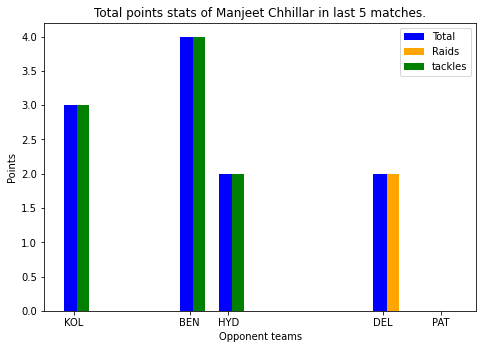

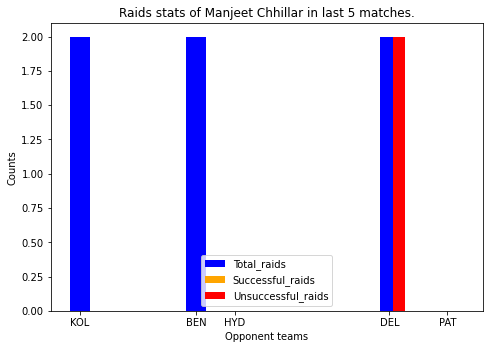

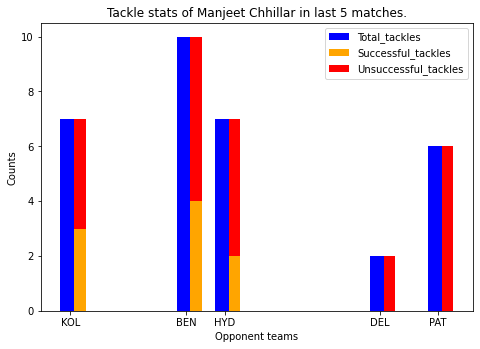

In [368]:
GetPerformanceStat(69, 5)

In [ ]:
# def teams_player_played_for(Id):
#   team_ids = players.groupby(['player_id','team_id']).match_id.unique().loc[Id].index
#   team_names = pd.DataFrame()
#   team_match_counts = []
#   total_raids = []
#   successful_raids = []
#   unsuccessful_raids = []
#   empty_raids = []
#   total_tackles = []
#   unsuccessful_tackles = []
#   successful_tackles = []
#   total_points = []
#   raid_points_total = []
#   tackle_points_total = []

#   for id in team_ids:
#     team_match_counts.append(len(players.groupby(['player_id','team_id']).match_id.unique().loc[Id].loc[id]))
#     total_raids.append(players.groupby(['player_id','team_id']).player_raids_total.sum().loc[Id].loc[id])
#     successful_raids.append(players.groupby(['player_id','team_id']).player_raids_successful.sum().loc[Id].loc[id])
#     unsuccessful_raids.append(players.groupby(['player_id','team_id']).player_raids_unsuccessful.sum().loc[Id].loc[id])
#     empty_raids.append(players.groupby(['player_id','team_id']).player_raids_Empty.sum().loc[Id].loc[id])
#     total_tackles.append(players.groupby(['player_id','team_id']).player_tackles_total.sum().loc[Id].loc[id])
#     successful_tackles.append(players.groupby(['player_id','team_id']).player_tackles_successful.sum().loc[Id].loc[id])
#     unsuccessful_tackles.append(players.groupby(['player_id','team_id']).player_tackles_unsuccessful.sum().loc[Id].loc[id])

#     total_points.append(players.groupby(['player_id','team_id']).player_total_points.sum().loc[Id].loc[id])
#     raid_points_total.append(players.groupby(['player_id','team_id']).player_raid_points_total.sum().loc[Id].loc[id])
#     tackle_points_total.append(players.groupby(['player_id','team_id']).player_tackle_points_total.sum().loc[Id].loc[id])
#     team_names = pd.concat([team_names , pd.DataFrame(teams[teams.id == id].values)])



#   team_names.columns = ['team_id','Name','short_name']
#   team_names['Matches Played'] = team_match_counts
#   team_names['total_points'] = total_points
#   team_names['raid_points_total'] = raid_points_total
#   team_names['tackle_points_total'] = tackle_points_total 
#   team_names['total_raids'] = total_raids
#   team_names['successful_raids'] = successful_raids
#   team_names['unsuccessful_raids'] = unsuccessful_raids
#   team_names['empty_raids'] = empty_raids
#   team_names['total_tackles'] = total_tackles
#   team_names['successful_tackles'] = successful_tackles
#   team_names['unsuccessful_tackles'] = unsuccessful_tackles
   


#   return team_names

# Teams

In [ ]:
teams = pd.read_csv('https://raw.githubusercontent.com/ranganadhkodali/Pro-Kabadi-season-1-7-Stats/master/DS_team.csv')

In [ ]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1368 non-null   int64  
 1   id                                        1368 non-null   int64  
 2   match_id                                  1368 non-null   int64  
 3   name                                      1368 non-null   object 
 4   score                                     1368 non-null   int64  
 5   short_name                                1368 non-null   object 
 6   squad                                     1368 non-null   object 
 7   state_of_play                             0 non-null      float64
 8   state_of_play.is_raiding_now              596 non-null    object 
 9   state_of_play.last_raid.id                596 non-null    float64
 10  state_of_play.last_raid.result      

In [ ]:
teams.head()

,Unnamed: 0,id,match_id,name,score,short_name,squad,state_of_play,state_of_play.is_raiding_now,state_of_play.last_raid.id,state_of_play.last_raid.result,state_of_play.players,state_of_play.players_on_court,stats.all_outs,stats.declare,stats.points.all_out,stats.points.declare,stats.points.extras,stats.points.raid_points.raid_bonus,stats.points.raid_points.total,stats.points.raid_points.touch,stats.points.tackle_points.capture,stats.points.tackle_points.capture_bonus,stats.points.tackle_points.total,stats.points.total,stats.raids.Empty,stats.raids.successful,stats.raids.super_raids,stats.raids.total,stats.raids.unsuccessful,stats.tackles.successful,stats.tackles.super_tackles,stats.tackles.total,stats.tackles.unsuccessful
0,0,3,1,Jaipur Pink Panthers,28,JAI,"[{'id': 15, 'name': 'Sanjay Shrestha', 'short_...",NaN,False,0.0,NaN,"[{'id': 0, 'is_raiding_now': False, 'on_court'...",0.0,2,0,2,0,0,3,25,22,1,0,1,28,10,20,NaN,40,10,1,NaN,24,23
1,1,5,1,U Mumba,44,MUM,"[{'id': 54, 'name': 'Jeeva Kumar', 'short_name...",NaN,False,0.0,NaN,"[{'id': 0, 'is_raiding_now': False, 'on_court'...",0.0,4,0,4,0,0,5,28,23,12,0,12,44,15,21,NaN,40,4,10,NaN,32,22
2,0,2,10,Dabang Delhi K.C.,39,DEL,"[{'id': 4, 'name': 'Ehsan Zamani Fard', 'short...",NaN,False,0.0,NaN,"[{'id': 0, 'is_raiding_now': False, 'on_court'...",0.0,4,0,4,0,0,5,26,21,9,0,9,39,8,24,NaN,44,12,8,NaN,27,19
3,1,4,10,Bengal Warriors,40,KOL,"[{'id': 5, 'name': 'Farhad Kamal Gharibi', 'sh...",NaN,False,0.0,NaN,"[{'id': 0, 'is_raiding_now': False, 'on_court'...",0.0,4,0,4,0,0,6,25,19,11,0,11,40,20,16,NaN,45,9,11,NaN,32,21
4,0,2,100,Dabang Delhi,45,DEL,"[{'id': 58, 'name': 'Kashiling Adake', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,1,0,6,0,1,1,23,22,13,2,15,45,25,13,NaN,45,7,13,NaN,25,12


In [ ]:
teams['Unnamed: 0'].value_counts()

1    684
0    684
Name: Unnamed: 0, dtype: int64

In [ ]:
teams[teams.id == 5]['Unnamed: 0'].value_counts()

0    66
1    57
Name: Unnamed: 0, dtype: int64

In [ ]:
teams.id.value_counts()[:12].sum()

1218

* ids of to 12 teams which participates in pro kabaddi.

In [ ]:
team_ids = teams.id.value_counts()[:12].index      # ids of to 12 teams which participates in pro kabaddi
team_ids

Int64Index([6, 5, 1, 3, 4, 7, 8, 2, 31, 30, 29, 28], dtype='int64')

In [ ]:
for i in team_ids:
  print( i , teams[teams.id == i].name.unique() , teams[teams.id == i].id.value_counts())
  print(teams[teams.id == i]['Unnamed: 0'].value_counts())

6 ['Patna Pirates'] 6    129
Name: id, dtype: int64
1    66
0    63
Name: Unnamed: 0, dtype: int64
5 ['U Mumba'] 5    123
Name: id, dtype: int64
0    66
1    57
Name: Unnamed: 0, dtype: int64
1 ['Bengaluru Bulls'] 1    121
Name: id, dtype: int64
0    67
1    54
Name: Unnamed: 0, dtype: int64
3 ['Jaipur Pink Panthers'] 3    120
Name: id, dtype: int64
0    63
1    57
Name: Unnamed: 0, dtype: int64
4 ['Bengal Warriors'] 4    120
Name: id, dtype: int64
0    64
1    56
Name: Unnamed: 0, dtype: int64
7 ['Puneri Paltan'] 7    120
Name: id, dtype: int64
1    65
0    55
Name: Unnamed: 0, dtype: int64
8 ['Telugu Titans'] 8    120
Name: id, dtype: int64
1    68
0    52
Name: Unnamed: 0, dtype: int64
2 ['Dabang Delhi K.C.' 'Dabang Delhi'] 2    116
Name: id, dtype: int64
0    66
1    50
Name: Unnamed: 0, dtype: int64
31 ['Gujarat Fortunegiants'] 31    64
Name: id, dtype: int64
0    36
1    28
Name: Unnamed: 0, dtype: int64
30 ['U.P. Yoddha'] 30    64
Name: id, dtype: int64
1    38
0    26
Name: Unn

* At above chell we get to know that the Unnamed 0 col is basically tells winning status of the teams.

Creating a new dataframe that will contain the matches of pro kabbadi.

In [ ]:
teams_data = pd.DataFrame()

In [ ]:
for i in team_ids:
  teams_data = pd.concat([teams_data , teams[teams.id == i]])

In [ ]:
teams_data.rename(columns={"Unnamed: 0": "win"} , inplace=True)

In [ ]:
teams_data.head()

,win,id,match_id,name,score,short_name,squad,state_of_play,state_of_play.is_raiding_now,state_of_play.last_raid.id,state_of_play.last_raid.result,state_of_play.players,state_of_play.players_on_court,stats.all_outs,stats.declare,stats.points.all_out,stats.points.declare,stats.points.extras,stats.points.raid_points.raid_bonus,stats.points.raid_points.total,stats.points.raid_points.touch,stats.points.tackle_points.capture,stats.points.tackle_points.capture_bonus,stats.points.tackle_points.total,stats.points.total,stats.raids.Empty,stats.raids.successful,stats.raids.super_raids,stats.raids.total,stats.raids.unsuccessful,stats.tackles.successful,stats.tackles.super_tackles,stats.tackles.total,stats.tackles.unsuccessful
5,1,6,100,Patna Pirates,26,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,3,4,16,12,6,1,7,26,15,15,NaN,44,14,6,NaN,28,22
18,0,6,1051,Patna Pirates,11,PAT,"[{'id': 197, 'name': 'Pardeep Narwal', 'short_...",NaN,True,197.0,Unsuccessful Raid,"[{'id': 388, 'is_raiding_now': False, 'on_cour...",5.0,0,0,0,0,0,1,6,5,5,0,5,11,3,3,1.0,9,3,5,0.0,7,2
23,1,6,107,Patna Pirates,34,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0,1,3,21,18,9,1,10,34,25,14,NaN,47,8,9,NaN,25,16
26,0,6,109,Patna Pirates,27,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0,1,2,13,11,11,0,11,27,24,13,NaN,48,11,11,NaN,26,15
29,1,6,1091,Patna Pirates,5,PAT,"[{'id': 197, 'name': 'Pardeep Narwal', 'short_...",NaN,True,197.0,Unsuccessful Raid,"[{'id': 234, 'is_raiding_now': False, 'on_cour...",7.0,0,0,0,0,2,0,2,2,1,0,1,5,0,1,0.0,3,2,1,0.0,7,6


In [ ]:
teams_data[teams_data.match_id == 1091]

,win,id,match_id,name,score,short_name,squad,state_of_play,state_of_play.is_raiding_now,state_of_play.last_raid.id,state_of_play.last_raid.result,state_of_play.players,state_of_play.players_on_court,stats.all_outs,stats.declare,stats.points.all_out,stats.points.declare,stats.points.extras,stats.points.raid_points.raid_bonus,stats.points.raid_points.total,stats.points.raid_points.touch,stats.points.tackle_points.capture,stats.points.tackle_points.capture_bonus,stats.points.tackle_points.total,stats.points.total,stats.raids.Empty,stats.raids.successful,stats.raids.super_raids,stats.raids.total,stats.raids.unsuccessful,stats.tackles.successful,stats.tackles.super_tackles,stats.tackles.total,stats.tackles.unsuccessful
29,1,6,1091,Patna Pirates,5,PAT,"[{'id': 197, 'name': 'Pardeep Narwal', 'short_...",NaN,True,197.0,Unsuccessful Raid,"[{'id': 234, 'is_raiding_now': False, 'on_cour...",7.0,0,0,0,0,2,0,2,2,1,0,1,5,0,1,0.0,3,2,1,0.0,7,6
28,0,30,1091,U.P. Yoddha,12,UPY,"[{'id': 2020, 'name': 'Amit', 'short_name': ''...",NaN,False,54.0,Successful Raid,"[{'id': 217, 'is_raiding_now': False, 'on_cour...",7.0,1,0,2,0,2,1,7,6,1,0,1,12,1,2,2.0,4,1,1,0.0,3,2


In [ ]:
teams_data.shape

(1218, 34)

In [ ]:
teams.id.value_counts()[:12].sum()

1218

<hr>

### Getting data ready for model.

In [ ]:
import re
r = re.compile("'id': [0-9]+")
r1 = re.compile('[0-9]+')
# l = re.findall(r , squ)
def f(d):                                         # to get a new column containing the list of player ids.
  l = []
  for i in re.findall(r , d):
    l.append(int( re.findall(r1 , i)[0])) 

  return l
teams_data['squad_ids'] = teams_data.squad.map(f)

In [ ]:
teams_data.shape

(1218, 35)

In [ ]:
teams_data.head()

,win,id,match_id,name,score,short_name,squad,state_of_play,state_of_play.is_raiding_now,state_of_play.last_raid.id,state_of_play.last_raid.result,state_of_play.players,state_of_play.players_on_court,stats.all_outs,stats.declare,stats.points.all_out,stats.points.declare,stats.points.extras,stats.points.raid_points.raid_bonus,stats.points.raid_points.total,stats.points.raid_points.touch,stats.points.tackle_points.capture,stats.points.tackle_points.capture_bonus,stats.points.tackle_points.total,stats.points.total,stats.raids.Empty,stats.raids.successful,stats.raids.super_raids,stats.raids.total,stats.raids.unsuccessful,stats.tackles.successful,stats.tackles.super_tackles,stats.tackles.total,stats.tackles.unsuccessful,squad_ids
5,1,6,100,Patna Pirates,26,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,3,4,16,12,6,1,7,26,15,15,NaN,44,14,6,NaN,28,22,"[142, 162, 208, 46, 92, 211, 161, 14, 20, 18, ..."
18,0,6,1051,Patna Pirates,11,PAT,"[{'id': 197, 'name': 'Pardeep Narwal', 'short_...",NaN,True,197.0,Unsuccessful Raid,"[{'id': 388, 'is_raiding_now': False, 'on_cour...",5.0,0,0,0,0,0,1,6,5,5,0,5,11,3,3,1.0,9,3,5,0.0,7,2,"[197, 123, 165, 388, 764, 790, 579, 200, 728, ..."
23,1,6,107,Patna Pirates,34,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0,1,3,21,18,9,1,10,34,25,14,NaN,47,8,9,NaN,25,16,"[142, 92, 46, 162, 161, 212, 207, 14, 20, 208,..."
26,0,6,109,Patna Pirates,27,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0,1,2,13,11,11,0,11,27,24,13,NaN,48,11,11,NaN,26,15,"[142, 46, 162, 161, 14, 211, 212, 20, 18, 208,..."
29,1,6,1091,Patna Pirates,5,PAT,"[{'id': 197, 'name': 'Pardeep Narwal', 'short_...",NaN,True,197.0,Unsuccessful Raid,"[{'id': 234, 'is_raiding_now': False, 'on_cour...",7.0,0,0,0,0,2,0,2,2,1,0,1,5,0,1,0.0,3,2,1,0.0,7,6,"[197, 632, 768, 390, 211, 579, 250, 234, 745, ..."


In [ ]:
teams[teams.match_id == 100]

,Unnamed: 0,id,match_id,name,score,short_name,squad,state_of_play,state_of_play.is_raiding_now,state_of_play.last_raid.id,state_of_play.last_raid.result,state_of_play.players,state_of_play.players_on_court,stats.all_outs,stats.declare,stats.points.all_out,stats.points.declare,stats.points.extras,stats.points.raid_points.raid_bonus,stats.points.raid_points.total,stats.points.raid_points.touch,stats.points.tackle_points.capture,stats.points.tackle_points.capture_bonus,stats.points.tackle_points.total,stats.points.total,stats.raids.Empty,stats.raids.successful,stats.raids.super_raids,stats.raids.total,stats.raids.unsuccessful,stats.tackles.successful,stats.tackles.super_tackles,stats.tackles.total,stats.tackles.unsuccessful
4,0,2,100,Dabang Delhi,45,DEL,"[{'id': 58, 'name': 'Kashiling Adake', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,1,0,6,0,1,1,23,22,13,2,15,45,25,13,NaN,45,7,13,NaN,25,12
5,1,6,100,Patna Pirates,26,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,3,4,16,12,6,1,7,26,15,15,NaN,44,14,6,NaN,28,22


In [ ]:
teams_data.columns

Index(['win', 'id', 'match_id', 'name', 'score', 'short_name', 'squad',
       'state_of_play', 'state_of_play.is_raiding_now',
       'state_of_play.last_raid.id', 'state_of_play.last_raid.result',
       'state_of_play.players', 'state_of_play.players_on_court',
       'stats.all_outs', 'stats.declare', 'stats.points.all_out',
       'stats.points.declare', 'stats.points.extras',
       'stats.points.raid_points.raid_bonus', 'stats.points.raid_points.total',
       'stats.points.raid_points.touch', 'stats.points.tackle_points.capture',
       'stats.points.tackle_points.capture_bonus',
       'stats.points.tackle_points.total', 'stats.points.total',
       'stats.raids.Empty', 'stats.raids.successful',
       'stats.raids.super_raids', 'stats.raids.total',
       'stats.raids.unsuccessful', 'stats.tackles.successful',
       'stats.tackles.super_tackles', 'stats.tackles.total',
       'stats.tackles.unsuccessful', 'squad_ids'],
      dtype='object')

In [ ]:
new_data = teams_data[['win', 'id', 'match_id', 'name', 'score', 'short_name','squad_ids']]

In [ ]:
new_data

,win,id,match_id,name,score,short_name,squad_ids
5,1,6,100,Patna Pirates,26,PAT,"[142, 162, 208, 46, 92, 211, 161, 14, 20, 18, ..."
18,0,6,1051,Patna Pirates,11,PAT,"[197, 123, 165, 388, 764, 790, 579, 200, 728, ..."
23,1,6,107,Patna Pirates,34,PAT,"[142, 92, 46, 162, 161, 212, 207, 14, 20, 208,..."
26,0,6,109,Patna Pirates,27,PAT,"[142, 46, 162, 161, 14, 211, 212, 20, 18, 208,..."
29,1,6,1091,Patna Pirates,5,PAT,"[197, 632, 768, 390, 211, 579, 250, 234, 745, ..."
...,...,...,...,...,...,...,...
1225,1,28,722,Haryana Steelers,29,HS,"[2357, 578, 165, 366, 388, 2462, 732, 335, 608..."
1239,1,28,729,Haryana Steelers,31,HS,"[366, 2328, 2463, 578, 388, 2462, 732, 335, 60..."
1246,0,28,732,Haryana Steelers,37,HS,"[388, 578, 165, 732, 2462, 2357, 366, 335, 644..."
1269,1,28,742,Haryana Steelers,30,HS,"[2357, 578, 165, 366, 388, 2462, 732, 335, 608..."


In [ ]:
len(new_data.match_id.unique())

609

In [ ]:
new_data[new_data.match_id == 1091][['win','id','score']]

,win,id,score
29,1,6,5
28,0,30,12


In [ ]:
for i in new_data.match_id.unique():
  ind = new_data[new_data.match_id == i].index
  if new_data.loc[ind[0] ,'score'] < new_data.loc[ind[1] ,'score'] :
    new_data.loc[ind[1] ,'win'] = 1
    new_data.loc[ind[0] ,'win'] = 0
  elif new_data.loc[ind[0] ,'score'] == new_data.loc[ind[1] ,'score'] :
    new_data.loc[ind[1] ,'win'] = 0
    new_data.loc[ind[0] ,'win'] = 0
  else:
    new_data.loc[ind[1] ,'win'] = 0
    new_data.loc[ind[0] ,'win'] = 1



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
new_data[new_data.match_id == 1091][['win','id','score']]

,win,id,score
29,0,6,5
28,1,30,12


In [ ]:
new_data[new_data.match_id == 751]

,win,id,match_id,name,score,short_name,squad_ids
1289,0,29,751,Tamil Thalaivas,40,TT,"[26, 212, 722, 111, 2325, 191, 2481, 2277, 376..."
1288,0,28,751,Haryana Steelers,40,HS,"[388, 578, 2463, 732, 2462, 2357, 366, 608, 44..."


In [ ]:
new_data.win.value_counts()

0    666
1    552
Name: win, dtype: int64

In [ ]:
new_data

,win,id,match_id,name,score,short_name,squad_ids
5,0,6,100,Patna Pirates,26,PAT,"[142, 162, 208, 46, 92, 211, 161, 14, 20, 18, ..."
18,0,6,1051,Patna Pirates,11,PAT,"[197, 123, 165, 388, 764, 790, 579, 200, 728, ..."
23,1,6,107,Patna Pirates,34,PAT,"[142, 92, 46, 162, 161, 212, 207, 14, 20, 208,..."
26,0,6,109,Patna Pirates,27,PAT,"[142, 46, 162, 161, 14, 211, 212, 20, 18, 208,..."
29,0,6,1091,Patna Pirates,5,PAT,"[197, 632, 768, 390, 211, 579, 250, 234, 745, ..."
...,...,...,...,...,...,...,...
1225,0,28,722,Haryana Steelers,29,HS,"[2357, 578, 165, 366, 388, 2462, 732, 335, 608..."
1239,0,28,729,Haryana Steelers,31,HS,"[366, 2328, 2463, 578, 388, 2462, 732, 335, 60..."
1246,0,28,732,Haryana Steelers,37,HS,"[388, 578, 165, 732, 2462, 2357, 366, 335, 644..."
1269,0,28,742,Haryana Steelers,30,HS,"[2357, 578, 165, 366, 388, 2462, 732, 335, 608..."


In [ ]:
new_data.to_csv('newData.csv')

In [ ]:
len(player_ids)

518

### Creating Model Data

In [ ]:
model_data = pd.DataFrame(columns=player_ids)

In [ ]:
model_data['win'] = new_data.win

In [ ]:
model_data

,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,28,29,30,32,33,34,36,38,41,42,43,44,45,46,47,48,...,837,608,614,2657,2659,220,222,223,224,225,2262,2274,2277,2278,2282,2286,2290,258,2295,2296,2297,262,267,2306,2314,2315,2316,2318,2328,2357,2020,2021,2023,2024,2025,2026,2028,2040,2041,win
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
model_data['win'][23]

1

In [ ]:
new_data['squad_ids'][23]

[142, 92, 46, 162, 161, 212, 207, 14, 20, 208, 211, 260]

In [ ]:
model_data.index

Int64Index([   5,   18,   23,   26,   29,   30,   43,   44,   51,   54,
            ...
            1145, 1179, 1191, 1194, 1220, 1225, 1239, 1246, 1269, 1288],
           dtype='int64', length=1218)

In [ ]:
for i in model_data.index:
  for playerId in new_data['squad_ids'][i]:
    model_data.loc[i ,playerId] = 1


In [ ]:
model_data

,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,28,29,30,32,33,34,36,38,41,42,43,44,45,46,47,48,...,837,608,614,2657,2659,220,222,223,224,225,2262,2274,2277,2278,2282,2286,2290,258,2295,2296,2297,262,267,2306,2314,2315,2316,2318,2328,2357,2020,2021,2023,2024,2025,2026,2028,2040,2041,win
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
print(new_data['squad_ids'][5])
print(new_data['squad_ids'][26])  # 14 in all of them
print(new_data['squad_ids'][29])

[142, 162, 208, 46, 92, 211, 161, 14, 20, 18, 212, 260]
[142, 46, 162, 161, 14, 211, 212, 20, 18, 208, 209, 260]
[197, 632, 768, 390, 211, 579, 250, 234, 745, 14, 384, 179]


In [ ]:
print(new_data['squad_ids'][1246])
print(new_data['squad_ids'][1269])       # 2357 in all of them
print(new_data['squad_ids'][1288])

[388, 578, 165, 732, 2462, 2357, 366, 335, 644, 608, 2463, 2328]
[2357, 578, 165, 366, 388, 2462, 732, 335, 608, 2463, 2318, 2328]
[388, 578, 2463, 732, 2462, 2357, 366, 608, 447, 165, 2328, 2337]


In [ ]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 5 to 1288
Columns: 519 entries, 1 to win
dtypes: int64(1), object(518)
memory usage: 4.9+ MB


In [ ]:
model_data = model_data.fillna(0)

In [ ]:
model_data

,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,28,29,30,32,33,34,36,38,41,42,43,44,45,46,47,48,...,837,608,614,2657,2659,220,222,223,224,225,2262,2274,2277,2278,2282,2286,2290,258,2295,2296,2297,262,267,2306,2314,2315,2316,2318,2328,2357,2020,2021,2023,2024,2025,2026,2028,2040,2041,win
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
1239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1269,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
model_data.to_csv('modelData.csv')

In [ ]:
features = model_data.drop(columns=['win'])
target = model_data.win

In [ ]:
print(features.shape)
print(target.size)

(1218, 518)
1218


In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(features, target )

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(trainX,trainY)

0.7612267250821467

In [ ]:
lr.score(testX,testY)

0.580327868852459

### RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( CV= 5)
rfc.fit(trainX , trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc.score(trainX , trainY)

0.8882803943044907

In [ ]:
rfc.score(testX ,testY)

0.5639344262295082

In [ ]:
rfc1 = RandomForestClassifier( criterion='entropy')
rfc1.fit(trainX , trainY)
rfc1.score(trainX , trainY)
rfc1.score(testX ,testY)

0.5836065573770491

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gs = GridSearchCV( RandomForestClassifier(), param_grid={'n_estimators':[200, 250 ,300] ,'max_depth':[10,15,20]}, cv=5, n_jobs=3)

In [ ]:
gs.fit(trainX , trainY)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
gs.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [ ]:
gs.best_score_

0.5958385876418663

In [ ]:
gs.score(testX, testY)

0.5934426229508196

In [ ]:
gs1 = GridSearchCV( RandomForestClassifier( criterion='entropy'), param_grid={'n_estimators':[200, 250 ,300] ,'max_depth':[10,15,20]}, cv=5, n_jobs=3)

In [ ]:
gs1.fit(trainX , trainY)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
  

In [ ]:
gs1.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [ ]:
gs1.best_score_

0.5947096619227767

In [ ]:
gs1.score(testX, testY)

0.5868852459016394

<hr>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [ ]:
adaboost = AdaBoostClassifier(base_estimator= RandomForestClassifier(n_estimators=100), n_estimators=100)

In [ ]:
adaboost.fit(trainX, trainY)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [ ]:
adaboost.score(trainX , trainY)

0.8882803943044907

In [ ]:
adaboost.score(testX ,testY)

0.5704918032786885

<hr>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbt = GradientBoostingClassifier(n_estimators=100)

In [ ]:
gbt.fit(trainX,trainY)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gbt.score(trainX , trainY)

0.7404162102957283

In [ ]:
gbt.score(testX ,testY)

0.5901639344262295

<hr>

In [ ]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
estimators = [ 
    ('rf',RandomForestClassifier(n_estimators=100 , criterion='entropy')),
    ('svc',SVC(kernel='rbf', probability=True)),
    ('knc',KNeighborsClassifier()),
    ('abc',AdaBoostClassifier(base_estimator=DecisionTreeClassifier( criterion='entropy') ,n_estimators=100)),
    ('lr',LogisticRegression()) 
]

In [ ]:
vc = VotingClassifier(estimators=estimators, voting='hard')

In [ ]:
vc.fit(trainX,trainY)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
     

In [ ]:
vc.score(trainX , trainY)

0.8116100766703176

In [ ]:
vc.score(testX, testY)

0.580327868852459

In [ ]:
knc = KNeighborsClassifier()
knc.fit( trainX , trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knc.score( trainX , trainY)

0.7075575027382256

In [ ]:
knc.score(testX ,testY)

0.5868852459016394

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix( testY , knc.predict(testX))

array([[106,  52],
       [ 74,  73]])

In [ ]:
testY.value_counts()

0    158
1    147
Name: win, dtype: int64

In [ ]:
trainX, testX, trainY, testY = train_test_split( features, target ,test_size= 0.20)

In [ ]:
knc1 = KNeighborsClassifier()
knc1.fit( trainX , trainY)
knc1.score( trainX , trainY)
knc1.score(testX ,testY)

0.5819672131147541

In [ ]:
confusion_matrix( testY , knc1.predict(testX))

array([[81, 47],
       [55, 61]])

In [ ]:
testY.value_counts()

0    128
1    116
Name: win, dtype: int64

In [ ]:
for i in team_ids:
  print( i , new_data[new_data.id == i].name.unique() , new_data[new_data.id == i].id.value_counts())
  print(new_data[new_data.id == i]['win'].value_counts())

6 ['Patna Pirates'] 6    129
Name: id, dtype: int64
1    67
0    62
Name: win, dtype: int64
5 ['U Mumba'] 5    123
Name: id, dtype: int64
1    76
0    47
Name: win, dtype: int64
1 ['Bengaluru Bulls'] 1    121
Name: id, dtype: int64
0    64
1    57
Name: win, dtype: int64
3 ['Jaipur Pink Panthers'] 3    120
Name: id, dtype: int64
0    68
1    52
Name: win, dtype: int64
4 ['Bengal Warriors'] 4    120
Name: id, dtype: int64
0    68
1    52
Name: win, dtype: int64
7 ['Puneri Paltan'] 7    120
Name: id, dtype: int64
0    74
1    46
Name: win, dtype: int64
8 ['Telugu Titans'] 8    120
Name: id, dtype: int64
0    68
1    52
Name: win, dtype: int64
2 ['Dabang Delhi K.C.' 'Dabang Delhi'] 2    116
Name: id, dtype: int64
0    75
1    41
Name: win, dtype: int64
31 ['Gujarat Fortunegiants'] 31    64
Name: id, dtype: int64
1    39
0    25
Name: win, dtype: int64
30 ['U.P. Yoddha'] 30    64
Name: id, dtype: int64
0    37
1    27
Name: win, dtype: int64
29 ['Tamil Thalaivas'] 29    61
Name: id, dtype:

## Naive Bayes classifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving modelData.csv to modelData.csv


In [ ]:
model_data = pd.read_csv('modelData.csv' , index_col='Unnamed: 0') 

In [ ]:
model_data.head()

,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,28,29,30,32,33,34,36,38,41,42,43,44,45,46,47,48,...,837,608,614,2657,2659,220,222,223,224,225,2262,2274,2277,2278,2282,2286,2290,258,2295,2296,2297,262,267,2306,2314,2315,2316,2318,2328,2357,2020,2021,2023,2024,2025,2026,2028,2040,2041,win
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = model_data.drop(columns=['win'])
target = model_data.win

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(features, target )

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bnb = BernoulliNB()
bnb.fit(trainX, trainY)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
bnb.score( trainX , trainY)

0.6779846659364732

In [ ]:
bnb.score(testX , testY)

0.5344262295081967

# Experimental analysis

In [1]:
from google.colab import files
uploaded = files.upload()

Saving newData.csv to newData.csv


In [5]:
new_data = pd.read_csv('newData.csv' , index_col='Unnamed: 0')

In [6]:
new_data.head()

,win,team_id,match_id,name,score,short_name,squad_ids
5,0,6,100,Patna Pirates,26,PAT,"[142, 162, 208, 46, 92, 211, 161, 14, 20, 18, ..."
18,0,6,1051,Patna Pirates,11,PAT,"[197, 123, 165, 388, 764, 790, 579, 200, 728, ..."
23,1,6,107,Patna Pirates,34,PAT,"[142, 92, 46, 162, 161, 212, 207, 14, 20, 208,..."
26,0,6,109,Patna Pirates,27,PAT,"[142, 46, 162, 161, 14, 211, 212, 20, 18, 208,..."
29,0,6,1091,Patna Pirates,5,PAT,"[197, 632, 768, 390, 211, 579, 250, 234, 745, ..."


In [ ]:
matches.head(2)

,match_id,match_number,date,start_time,result,player_id_of_the_match,player_name_of_the_match,series_id,series_name,status,toss_winner,toss_selection,venue_id,venue_name,home_team_id,home_team_name
0,1,Match 1,7/26/2014,20:00,U Mumba beat Jaipur Pink Panthers (45 - 31),29.0,29.0,1,"Pro Kabaddi League Season 1, 2014",Full Time,5,Choice of court : Right,5,"DOME@NSCI SVP Stadium, Mumbai",5.0,U Mumba
1,10,Match 10,7/31/2014,21:00,Bengal Warriors beat Dabang Delhi (42 - 40),12.0,12.0,1,"Pro Kabaddi League Season 1, 2014",Full Time,2,Choice of court : Left,4,"Netaji Subhash Chandra Bose Indoor Stadium, Ko...",4.0,Bengal Warriors


In [ ]:
matches[(matches.match_id == 1) & ( matches.toss_winner == 5) ].shape[0]

1

In [ ]:
def f(r):
  return matches[(matches.match_id == r.match_id) & (matches.toss_winner == r.team_id )].shape[0]

new_data['toss_win'] = new_data.apply(f, axis=1)

In [ ]:
new_data.head()

,win,team_id,match_id,name,score,short_name,squad_ids,toss_win
5,0,6,100,Patna Pirates,26,PAT,"[142, 162, 208, 46, 92, 211, 161, 14, 20, 18, ...",1
18,0,6,1051,Patna Pirates,11,PAT,"[197, 123, 165, 388, 764, 790, 579, 200, 728, ...",0
23,1,6,107,Patna Pirates,34,PAT,"[142, 92, 46, 162, 161, 212, 207, 14, 20, 208,...",0
26,0,6,109,Patna Pirates,27,PAT,"[142, 46, 162, 161, 14, 211, 212, 20, 18, 208,...",1
29,0,6,1091,Patna Pirates,5,PAT,"[197, 632, 768, 390, 211, 579, 250, 234, 745, ...",0


In [ ]:
matches[matches.match_id == 109].toss_winner

13    6
Name: toss_winner, dtype: int64

In [ ]:
model_data['toss_win'] = new_data['toss_win'] 

In [ ]:
model_data

,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,28,29,30,32,33,34,36,38,41,42,43,44,45,46,47,48,...,608,614,2657,2659,220,222,223,224,225,2262,2274,2277,2278,2282,2286,2290,258,2295,2296,2297,262,267,2306,2314,2315,2316,2318,2328,2357,2020,2021,2023,2024,2025,2026,2028,2040,2041,win,toss_win
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
26,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1269,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
features = model_data.drop(columns=['win'])
target = model_data.win

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(features, target )

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(trainX, trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(trainX , trainY)

0.7677984665936474

In [ ]:
lr.score(testX, testY)

0.5508196721311476

# Opposition info.
<hr>
* Here we can determine the recent performance of a team.

In [245]:
col = [ 'id', 'match_id', 'name', 'score', 'short_name','stats.all_outs',  'stats.points.all_out','stats.points.extras','stats.points.raid_points.raid_bonus', 'stats.points.raid_points.total','stats.points.raid_points.touch', 'stats.points.tackle_points.capture','stats.points.tackle_points.capture_bonus','stats.points.tackle_points.total', 'stats.points.total','stats.raids.Empty', 'stats.raids.successful','stats.raids.super_raids', 'stats.raids.total','stats.raids.unsuccessful', 'stats.tackles.successful','stats.tackles.super_tackles', 'stats.tackles.total','stats.tackles.unsuccessful']

In [257]:
df = teams[teams.id == 1].sort_values(by= ['match_id'])[[ 'id', 'match_id', 'name', 'score', 'short_name','stats.all_outs',  'stats.points.all_out','stats.points.extras','stats.points.raid_points.raid_bonus', 'stats.points.raid_points.total','stats.points.raid_points.touch', 'stats.points.tackle_points.capture','stats.points.tackle_points.capture_bonus','stats.points.tackle_points.total', 'stats.points.total','stats.raids.Empty', 'stats.raids.successful','stats.raids.super_raids', 'stats.raids.total','stats.raids.unsuccessful', 'stats.tackles.successful','stats.tackles.super_tackles', 'stats.tackles.total','stats.tackles.unsuccessful']][-5:]


,id,match_id,name,score,short_name,stats.all_outs,stats.points.all_out,stats.points.extras,stats.points.raid_points.raid_bonus,stats.points.raid_points.total,stats.points.raid_points.touch,stats.points.tackle_points.capture,stats.points.tackle_points.capture_bonus,stats.points.tackle_points.total,stats.points.total,stats.raids.Empty,stats.raids.successful,stats.raids.super_raids,stats.raids.total,stats.raids.unsuccessful,stats.tackles.successful,stats.tackles.super_tackles,stats.tackles.total,stats.tackles.unsuccessful
309,1,1742,Bengaluru Bulls,41,BEN,2,4,0,6,21,15,16,0,16,41,15,16,1.0,44,13,16,0.0,25,9
328,1,1751,Bengaluru Bulls,23,BEN,0,0,1,4,9,5,10,3,13,23,21,9,0.0,44,14,10,3.0,20,10
334,1,1754,Bengaluru Bulls,33,BEN,1,2,1,4,22,18,7,1,8,33,15,17,0.0,42,10,7,1.0,18,11
342,1,1758,Bengaluru Bulls,40,BEN,1,2,1,3,24,21,10,3,13,40,14,21,0.0,46,11,10,3.0,24,14
350,1,1761,Bengaluru Bulls,40,BEN,2,4,1,6,28,22,7,0,7,40,18,18,1.0,44,8,7,0.0,30,23


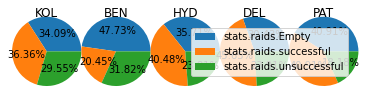

In [289]:
fig, axes= plt.subplots(1, 5)
langs = ['stats.raids.Empty','stats.raids.successful','stats.raids.unsuccessful']
for i, ax in enumerate(axes.flatten()):
  students = df[['stats.raids.Empty','stats.raids.successful','stats.raids.unsuccessful']][i:i+1].values[0]
  ax.pie(students, autopct='%1.2f%%' , radius= 1.5)
    # x = X[i,:]/np.sum(X[i,:])
    # ax.pie(x, radius = r[i], autopct="%.1f%%", pctdistance=0.9)
  ax.set_title(op_teams[i])
plt.legend(labels = langs)
plt.show()

([<matplotlib.patches.Wedge at 0x7f59bcde0f28>,
 [Text(0.5271738771746388, 0.965446893011034, 'stats.raids.Empty'),
  Text(-1.0888035780743386, -0.1565463777048765, 'stats.raids.successful'),
  Text(0.6592054706385212, -0.8805953369625835, 'stats.raids.unsuccessful')],
 [Text(0.28754938754980297, 0.5266073961878367, '34.09%'),
  Text(-0.593892860767821, -0.085388933293569, '36.36%'),
  Text(0.3595666203482843, -0.48032472925231817, '29.55%')])

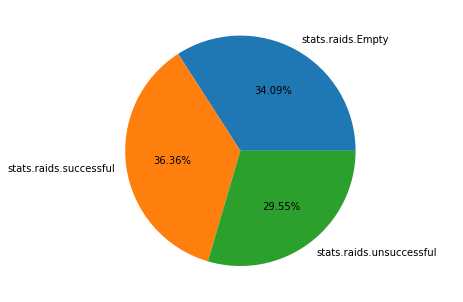

In [264]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['stats.raids.Empty','stats.raids.successful','stats.raids.unsuccessful']
students = df[['stats.raids.Empty','stats.raids.successful','stats.raids.unsuccessful']][:1].values[0]
ax.pie(students, labels = langs,autopct='%1.2f%%')

In [316]:
def GetTeamPerformanceStat(id , N = 5):
  df = teams[teams.id == id].sort_values(by= ['match_id'])[[ 'id', 'match_id', 'name', 'score', 'short_name','stats.all_outs',  'stats.points.all_out','stats.points.extras','stats.points.raid_points.raid_bonus', 'stats.points.raid_points.total','stats.points.raid_points.touch', 'stats.points.tackle_points.capture','stats.points.tackle_points.capture_bonus','stats.points.tackle_points.total', 'stats.points.total','stats.raids.Empty', 'stats.raids.successful','stats.raids.super_raids', 'stats.raids.total','stats.raids.unsuccessful', 'stats.tackles.successful','stats.tackles.super_tackles', 'stats.tackles.total','stats.tackles.unsuccessful']][-N:]
  op_teams = []
  wins= new_data[new_data.team_id == id].sort_values(by=['match_id'])[-N:].win.value_counts()
  name = teams_catalog[teams_catalog.team_id == id].team_name.values[0]
  for i in df[['match_id','id']].values:
    op_teams.append(new_data[(new_data.match_id == i[0]) & (new_data.team_id != i[1])].short_name.values[0])

  # Total points stats
  fig1 = plt.figure(1)
  ax = fig1.add_axes([0,0,1,1])
  ax.bar(df.match_id.values + 0.0, df['stats.points.total'], color = 'b', width = 1)
  ax.bar(df.match_id.values + 0.50, df['stats.points.raid_points.total'], color = 'orange', width = 0.60)
  ax.bar(df.match_id.values + 0.50, df['stats.points.tackle_points.total'] , bottom= df['stats.points.raid_points.total'] , color = 'g', width = 0.60)
  plt.xticks( df.match_id.values, labels=op_teams)
  plt.legend(labels=['Total','Raids', 'tackles'])
  plt.title('Total points stats of '+ name +' in last'+ str(N) +' matches.')
  plt.xlabel('Opponent teams')
  plt.ylabel('Points')
  # Raids Stats
  fig2 = plt.figure(2)
  ax = fig2.add_axes([0,0,1,1])
  ax.bar(df.match_id.values + 0.0, df['stats.raids.total'], color = 'b', width = 1)
  ax.bar(df.match_id.values + 0.50, df['stats.raids.successful'], color = 'orange', width = 0.60)
  ax.bar(df.match_id.values + 0.50, df['stats.raids.unsuccessful'] , bottom= df['stats.raids.successful'] , color = 'r', width = 0.60)
  plt.xticks( df.match_id.values, labels=op_teams)
  plt.legend(labels=['Total_raids','Successful_raids', 'Unsuccessful_raids'])
  plt.title('Raids stats of '+ name +' in last'+ str(N) +' matches.')
  plt.xlabel('Opponent teams')
  plt.ylabel('Counts')
  # Tackel stats
  fig3 = plt.figure(3)
  ax = fig3.add_axes([0,0,1,1])
  ax.bar(df.match_id.values + 0.0, df['stats.tackles.total'], color = 'b', width = 1)
  ax.bar(df.match_id.values + 0.50, df['stats.tackles.successful'], color = 'orange', width = 0.60)
  ax.bar(df.match_id.values + 0.50, df['stats.tackles.unsuccessful'] , bottom= df['stats.tackles.successful'] , color = 'r', width = 0.60)
  plt.xticks( df.match_id.values, labels=op_teams)
  plt.legend(labels=['Total_tackles','Successful_tackles', 'Unsuccessful_tackles'])
  plt.title('Tackle stats of '+ name +' in last'+ str(N) +' matches.')
  plt.xlabel('Opponent teams')
  plt.ylabel('Counts')
  return  wins ,plt.show()


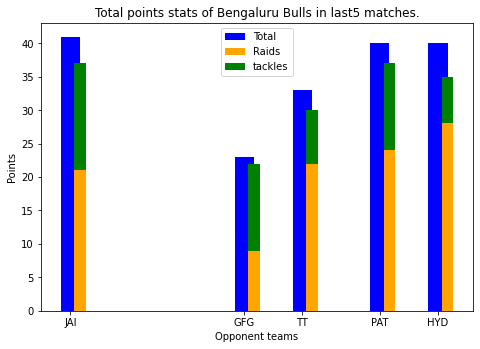

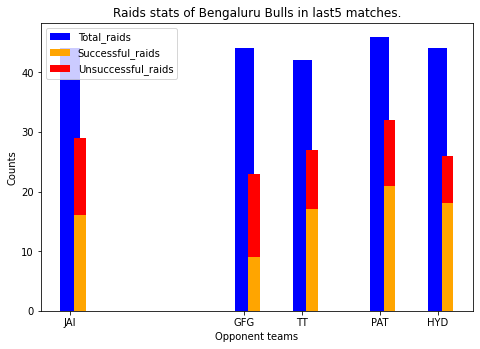

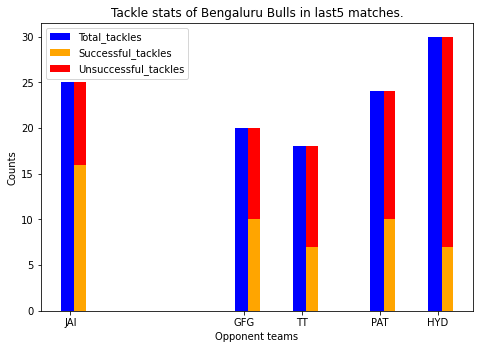

(1    4
 0    1
 Name: win, dtype: int64, None)

In [317]:
GetTeamPerformanceStat(1 , 5)

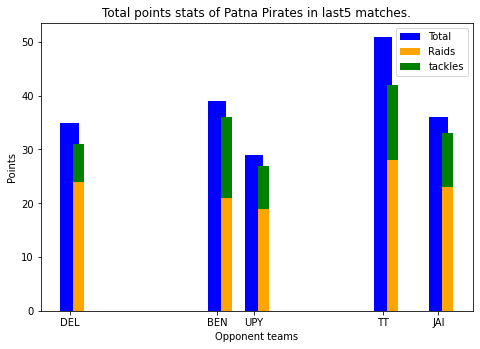

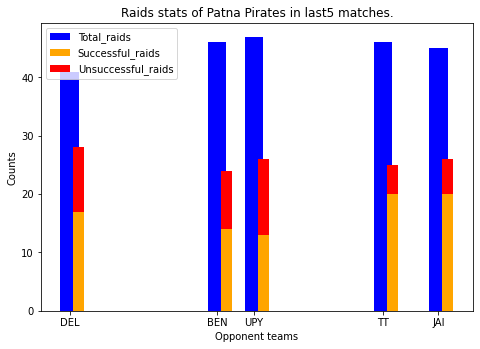

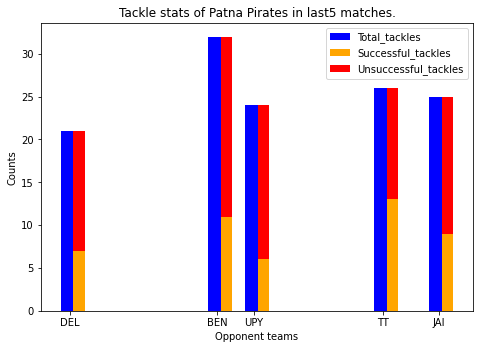

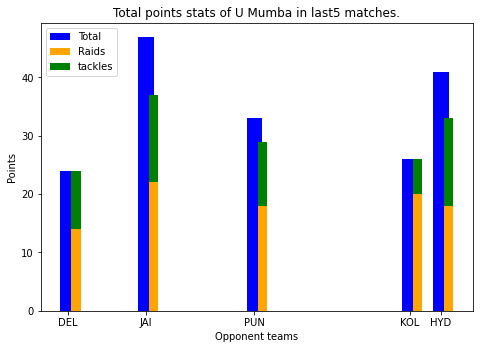

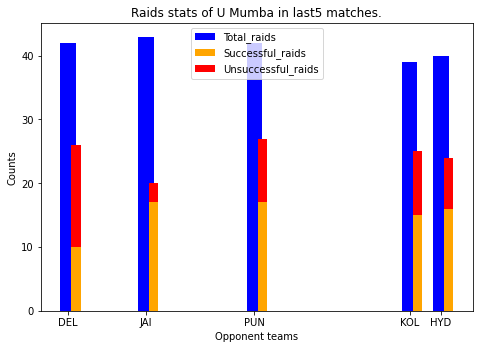

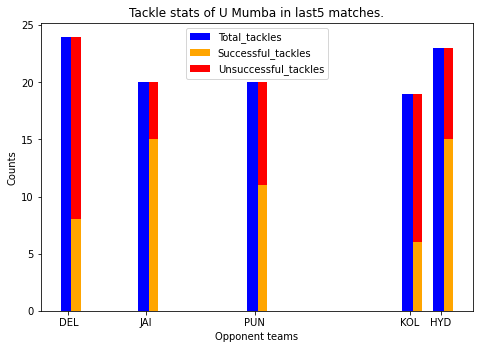

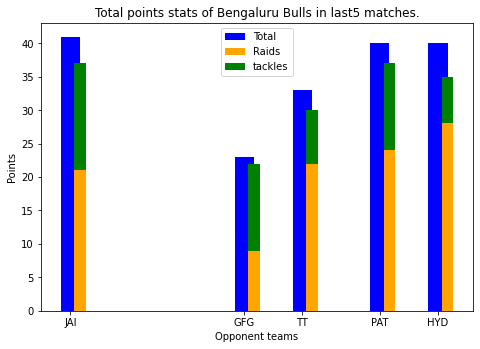

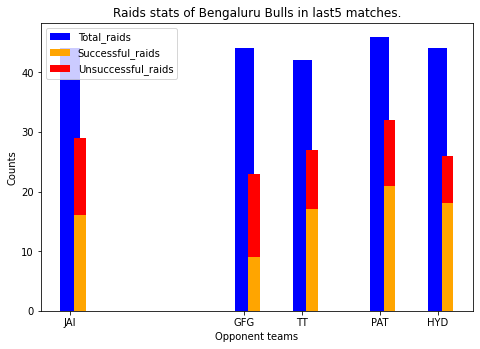

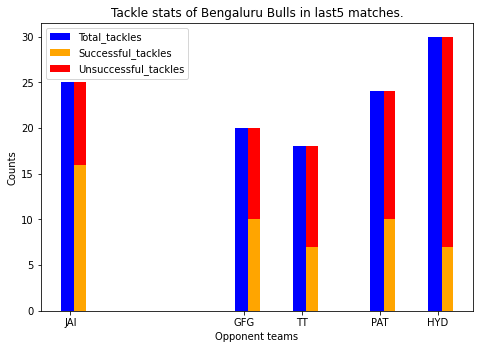

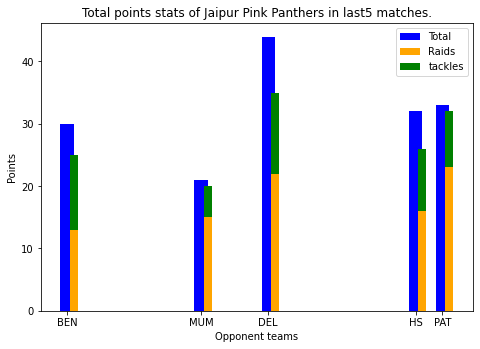

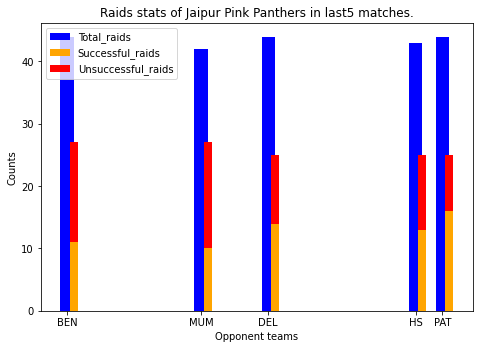

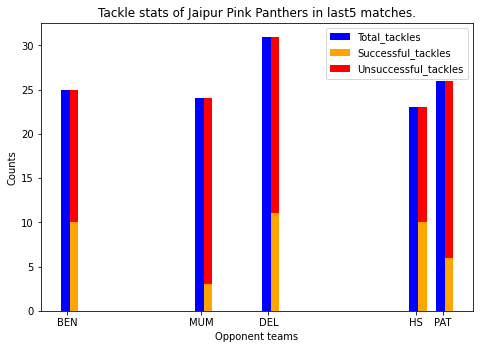

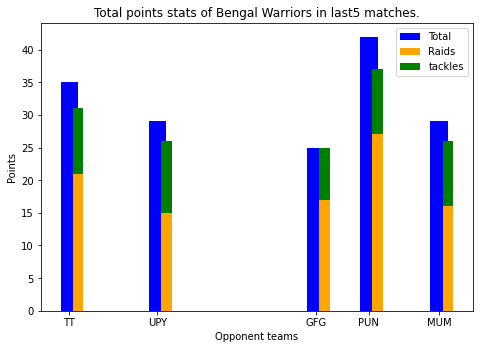

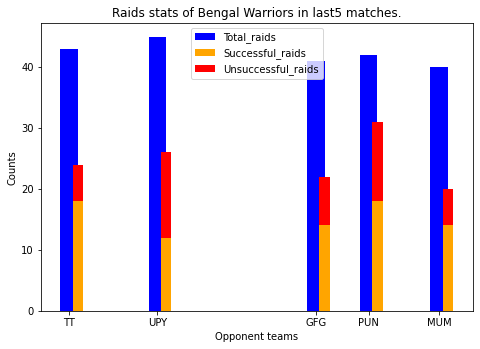

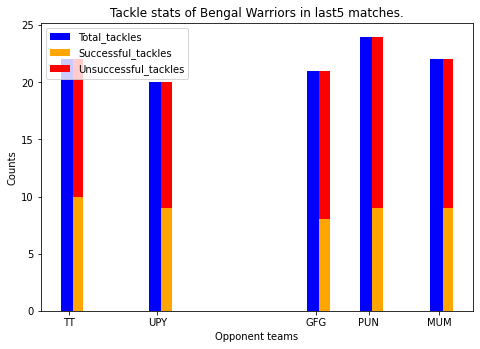

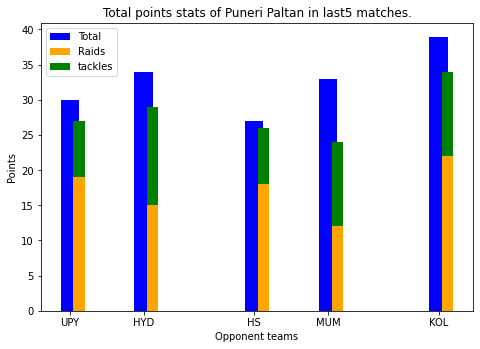

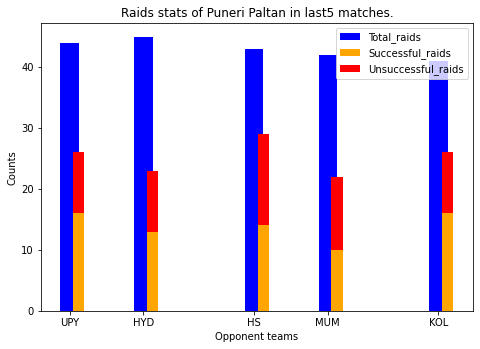

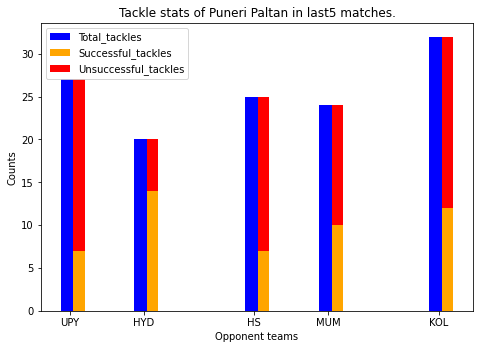

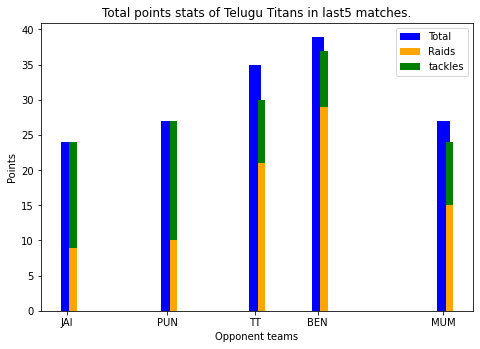

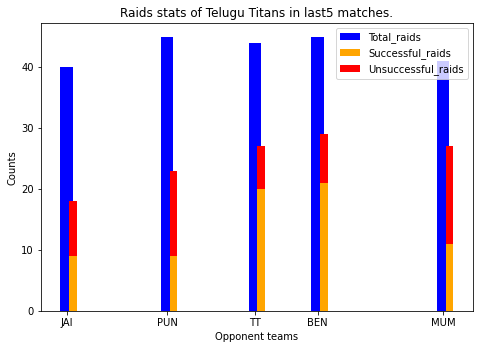

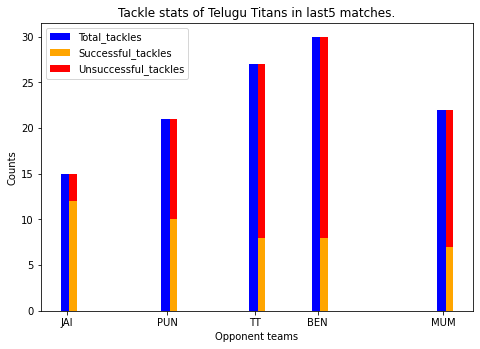

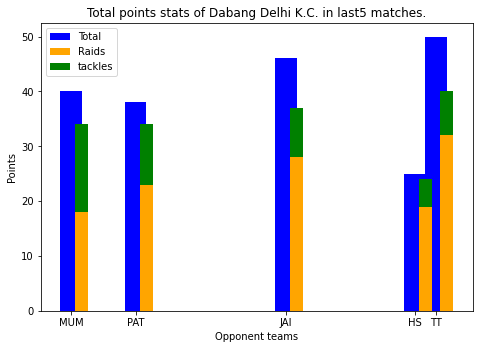

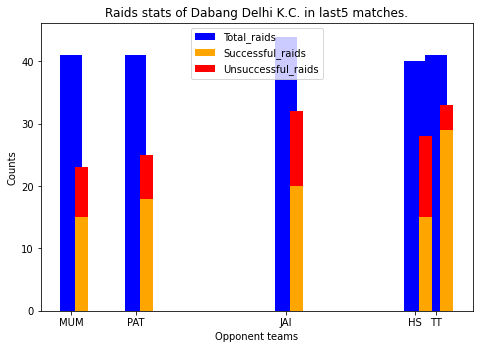

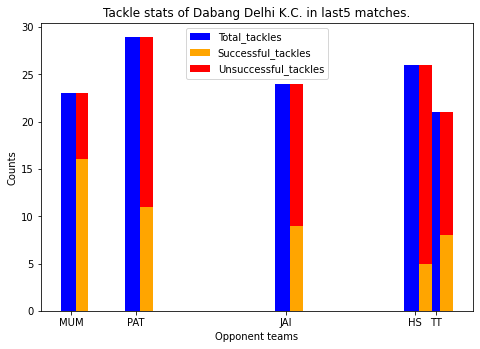

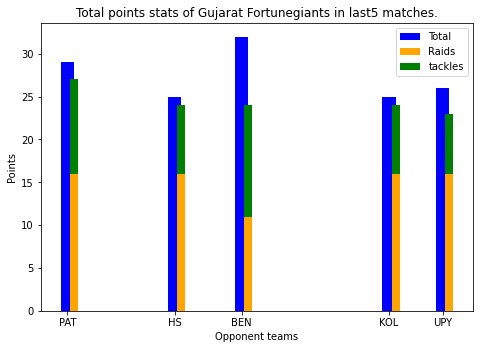

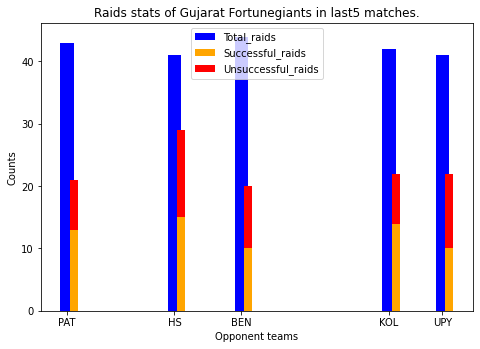

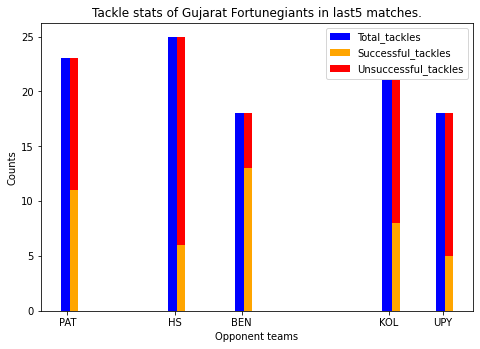

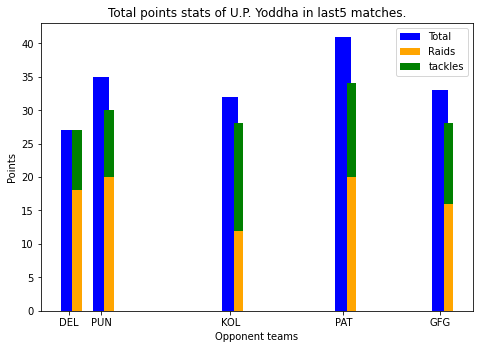

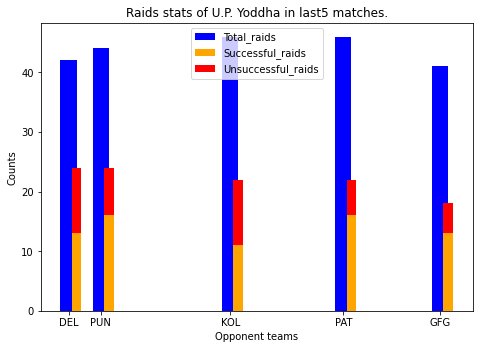

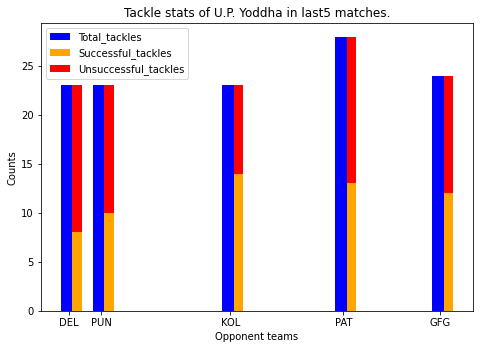

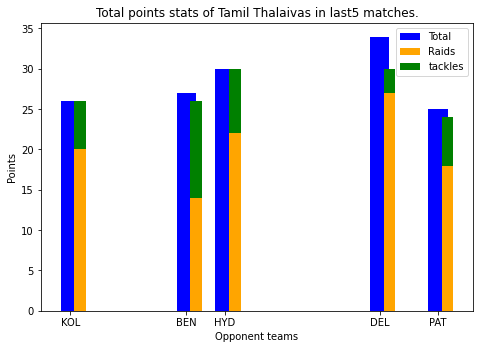

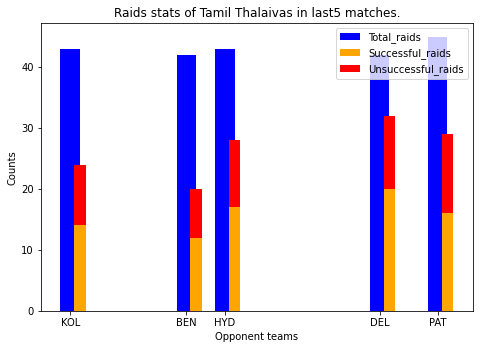

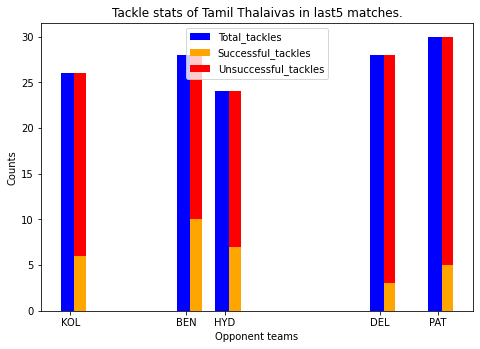

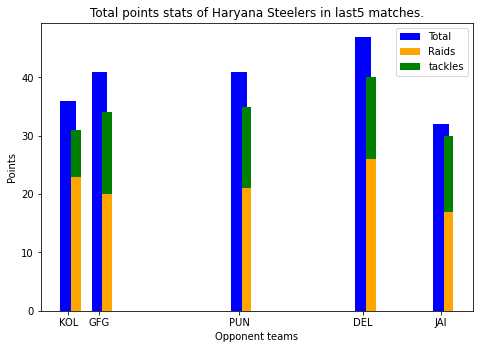

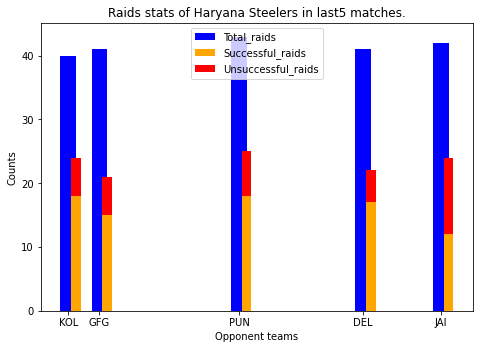

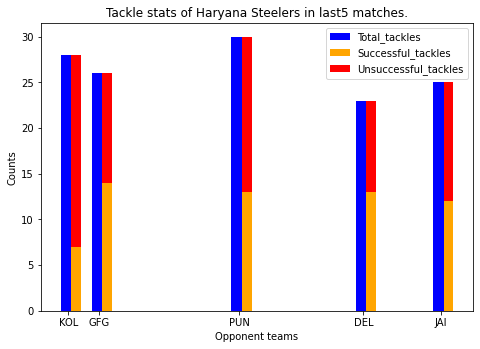

In [318]:
for i in team_ids:
  GetTeamPerformanceStat(i)